In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dmdt import *
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"]})

In [3]:
def download_npz(DIR):
    os.chdir('/Users/chang/Desktop/Santa Cruz/TDE_plot')
    flist = os.listdir()
    if not DIR in flist:
        os.system('mkdir {}'.format(DIR))
    os.chdir(DIR)
    os.system(
        'rsync -avz --progress "ptgcliu@fend01.hpc.ku.dk:/storage/dark/ptgcliu/{}/*.npz" .'
        .format(DIR))

In [81]:
#download_npz('m1.0_p10_b1.0_P110')
#download_npz('m1.0_p10_b1.0_P110_HR')
download_npz('m1.0_p10_b0.8_P110')
download_npz('m1.0_p10_b0.8_e9')
#download_npz('m1.0_p10_b0.6_P110')
#download_npz('m1.0_p10_b0.6_P50')
download_npz('m1.0_p10_b0.8')
#download_npz('m1.0_p10_b0.6')
download_npz('m1.0_p10_b1.0')
download_npz('m1.0_p10_b1.0_P110')
download_npz('m1.0_p10_b1.0_e9')

In [4]:
P110_b0_6_chk_0100_114 = dmdt(DIR='m1.0_p10_b0.6_P110', chk='0100', Period=114)
P110_b0_6_chk_0100 = dmdt(DIR='m1.0_p10_b0.6_P110', chk='0100', Period=-1)

P110_b1_chk_0080_114 = dmdt(DIR='m1.0_p10_b1.0_P110', chk='0080', Period=114)
P110_b1_chk_0080 = dmdt(DIR='m1.0_p10_b1.0_P110', chk='0080', Period=-1)

P110_b0_8_chk_0080_114 = dmdt(DIR='m1.0_p10_b0.8_P110', chk='0080', Period=114)
P110_b0_8_chk_0080 = dmdt(DIR='m1.0_p10_b0.8_P110', chk='0080', Period=-1)

P110_b0_6_chk_0080_114 = dmdt(DIR='m1.0_p10_b0.6_P110', chk='0080', Period=114)
P110_b0_6_chk_0080 = dmdt(DIR='m1.0_p10_b0.6_P110', chk='0080', Period=-1)

P110_b1_chk_0060_114 = dmdt(DIR='m1.0_p10_b1.0_P110', chk='0060', Period=114)
P110_b1_chk_0060 = dmdt(DIR='m1.0_p10_b1.0_P110', chk='0060', Period=-1)

P110_b0_8_chk_0060_114 = dmdt(DIR='m1.0_p10_b0.8_P110', chk='0060', Period=114)
P110_b0_8_chk_0060 = dmdt(DIR='m1.0_p10_b0.8_P110', chk='0060', Period=-1)

P110_b0_6_chk_0060_114 = dmdt(DIR='m1.0_p10_b0.6_P110', chk='0060', Period=114)
P110_b0_6_chk_0060 = dmdt(DIR='m1.0_p10_b0.6_P110', chk='0060', Period=-1)

b1_chk_0060 = dmdt(DIR='m1.0_p10_b1.0', chk='0060', Period=-1)
b0_8_chk_0060 = dmdt(DIR='m1.0_p10_b0.8', chk='0060', Period=-1)
b0_6_chk_0060 = dmdt(DIR='m1.0_p10_b0.6', chk='0060', Period=-1)

b1_chk_0080 = dmdt(DIR='m1.0_p10_b1.0', chk='0080', Period=-1)
b0_8_chk_0080 = dmdt(DIR='m1.0_p10_b0.8', chk='0080', Period=-1)
b0_6_chk_0080 = dmdt(DIR='m1.0_p10_b0.6', chk='0080', Period=-1)
b0_6_chk_0100 = dmdt(DIR='m1.0_p10_b0.6', chk='0100', Period=-1)

In [5]:
P50_b0_6_chk_0100_50 = dmdt(DIR='m1.0_p10_b0.6_P50', chk='0100', Period=50)
P50_b0_6_chk_0100 = dmdt(DIR='m1.0_p10_b0.6_P50', chk='0100', Period=-1)

P50_b1_chk_0080_50 = dmdt(DIR='m1.0_p10_b1.0_P50', chk='0080', Period=50)
P50_b1_chk_0080 = dmdt(DIR='m1.0_p10_b1.0_P50', chk='0080', Period=-1)

P50_b0_8_chk_0080_50 = dmdt(DIR='m1.0_p10_b0.8_P50', chk='0080', Period=50)
P50_b0_8_chk_0080 = dmdt(DIR='m1.0_p10_b0.8_P50', chk='0080', Period=-1)

P50_b0_6_chk_0080_50 = dmdt(DIR='m1.0_p10_b0.6_P50', chk='0080', Period=50)
P50_b0_6_chk_0080 = dmdt(DIR='m1.0_p10_b0.6_P50', chk='0080', Period=-1)

P50_b1_chk_0060_50 = dmdt(DIR='m1.0_p10_b1.0_P50', chk='0060', Period=50)
P50_b1_chk_0060 = dmdt(DIR='m1.0_p10_b1.0_P50', chk='0060', Period=-1)

P50_b0_8_chk_0060_50 = dmdt(DIR='m1.0_p10_b0.8_P50', chk='0060', Period=50)
P50_b0_8_chk_0060 = dmdt(DIR='m1.0_p10_b0.8_P50', chk='0060', Period=-1)

P50_b0_6_chk_0060_50 = dmdt(DIR='m1.0_p10_b0.6_P50', chk='0060', Period=50)
P50_b0_6_chk_0060 = dmdt(DIR='m1.0_p10_b0.6_P50', chk='0060', Period=-1)

In [6]:
e9_b1_chk_0060 = dmdt(DIR='m1.0_p10_b1.0_e9', chk='0060', Period=-1)
e9_b0_8_chk_0080 = dmdt(DIR='m1.0_p10_b0.8_e9', chk='0080', Period=-1)
e9_b1_chk_0060_0 = dmdt(DIR='m1.0_p10_b1.0_e9', chk='0060', Ecc=0.9)
e9_b0_8_chk_0080_0 = dmdt(DIR='m1.0_p10_b0.8_e9', chk='0080', Ecc=0.9)

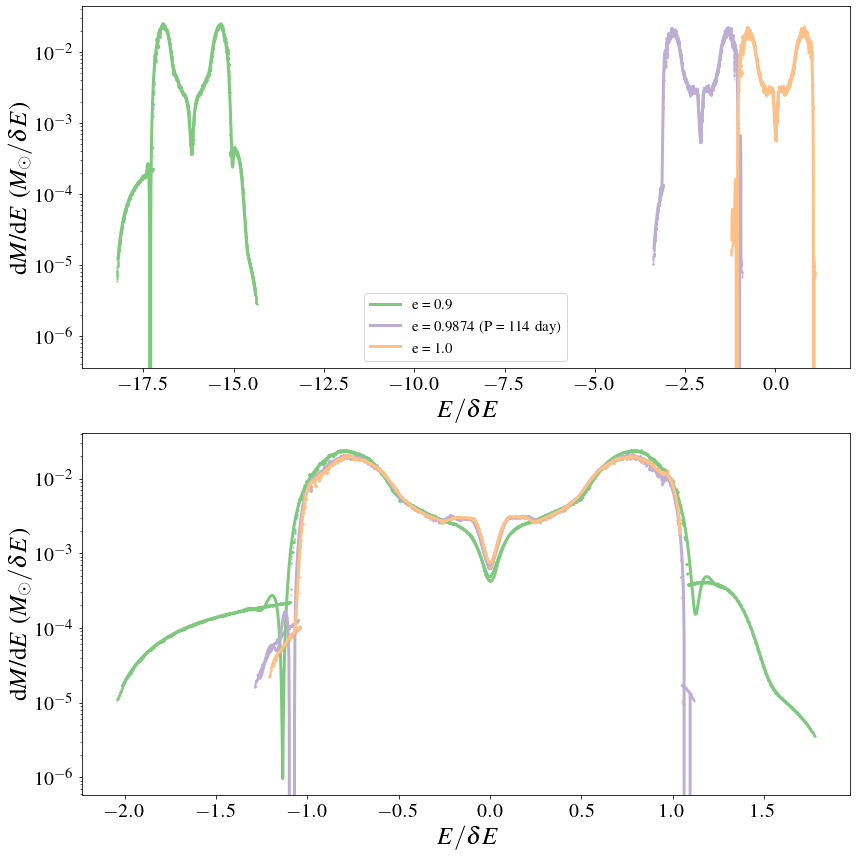

In [7]:
f, ax = plt.subplots(2, 1, figsize=(12, 12))
col = ['#7fc97f', '#beaed4', '#fdc086']

e9_b0_8_chk_0080_0.dm_de_e(ax=ax[0], color=col[0], Bin=100, beta=0.8)
P110_b0_8_chk_0080_114.dm_de_e(ax=ax[0], color=col[1], Bin=100, beta=0.8)
b0_8_chk_0080.dm_de_e(ax=ax[0], color=col[2], Bin=100, beta=0.8)

e9_b0_8_chk_0080.dm_de_e(ax=ax[1], color=col[0], Bin=200, beta=0.8, shift=True)
P110_b0_8_chk_0080.dm_de_e(ax=ax[1], color=col[1], Bin=200, beta=0.8, shift=True)
b0_8_chk_0080.dm_de_e(ax=ax[1], color=col[2], Bin=200, beta=0.8, shift=True)

f.tight_layout()
ax[0].legend(fontsize=15)

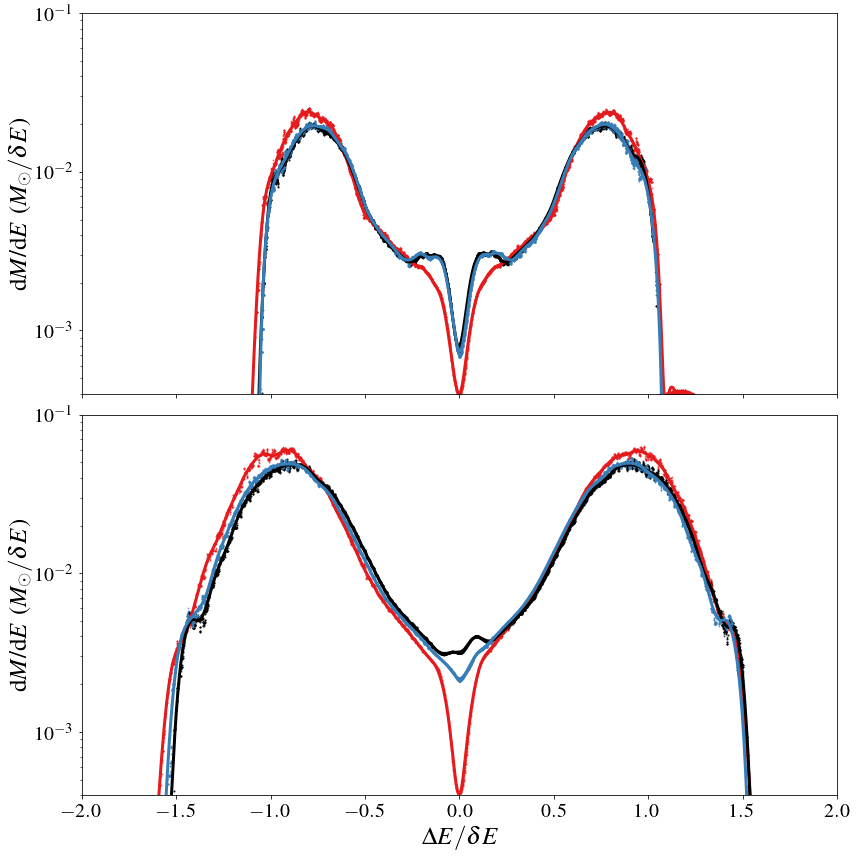

In [8]:
f, ax = plt.subplots(2, 1, figsize=(12, 12), sharey=True, sharex=True)
col = ['#e41a1c', '#377eb8', 'k']

e9_b0_8_chk_0080.dm_de_e(ax=ax[0],
                         color=col[0],
                         Bin=150,
                         beta=0.8,
                         shift=True,
                         n=100)
b0_8_chk_0080.dm_de_e(ax=ax[0], color=col[2], Bin=250, beta=0.8, shift=True)
P110_b0_8_chk_0080.dm_de_e(ax=ax[0],
                           color=col[1],
                           Bin=250,
                           beta=0.8,
                           shift=True)

e9_b1_chk_0060.dm_de_e(ax=ax[1], color=col[0], Bin=100, shift=True, n=150)
b1_chk_0060.dm_de_e(ax=ax[1], color=col[2], Bin=200, shift=True, n=90)
P110_b1_chk_0060.dm_de_e(ax=ax[1], color=col[1], Bin=200, shift=True, n=90)

f.tight_layout()
ax[1].set_xlim(-2, 2)
ax[0].set_ylim(4e-4, 1e-1)
ax[0].set_xlabel('')
ax[1].set_xlabel('$\Delta E/\delta E$', fontsize=25)
#ax[0].set_yscale('linear')
f.tight_layout()
#ax[0].legend()
plt.savefig(
    '/Users/chang/Desktop/Santa Cruz/ASASSN-14ko/YT_Visualization/dmde.pdf')

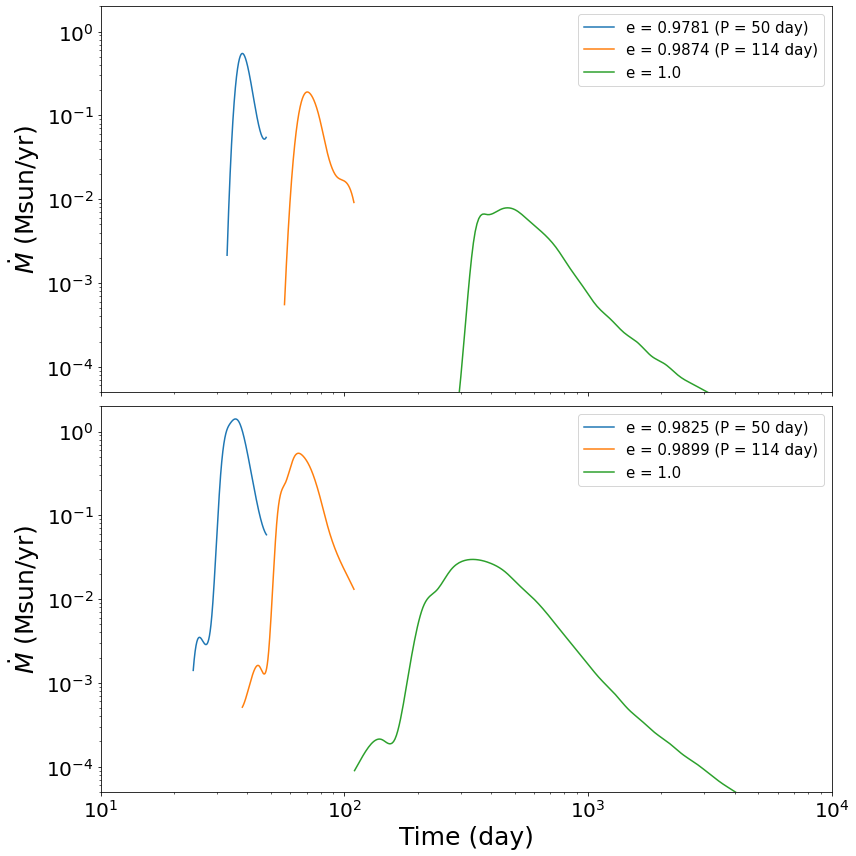

In [46]:
f, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True, sharey=True)
'''P50_b0_6_chk_0100_50.Mdot_t(ax=ax[0])
P110_b0_6_chk_0100_114.Mdot_t(ax=ax[0])
b0_6_chk_0100.Mdot_t(ax=ax[0])'''
P50_b0_8_chk_0080_50.Mdot_t(ax=ax[0])
P110_b0_8_chk_0080_114.Mdot_t(ax=ax[0])
b0_8_chk_0080.Mdot_t(ax=ax[0], N=18)
P50_b1_chk_0060_50.Mdot_t(ax=ax[1])
P110_b1_chk_0060_114.Mdot_t(ax=ax[1])
b1_chk_0060.Mdot_t(ax=ax[1], N=18)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('')
ax[1].set_yscale('log')
ax[0].set_ylim([5e-5, 2e0])
ax[0].set_xlim([1e1, 1e4])
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
plt.tight_layout()
plt.savefig('/Users/chang/Desktop/dmdt.png')

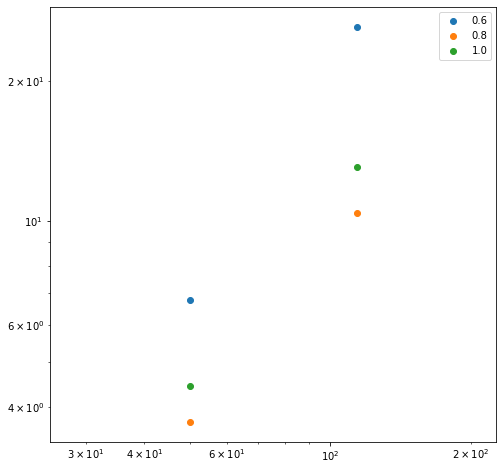

In [27]:
plt.figure(figsize=(8, 8))
for tde, beta in zip([[P50_b0_6_chk_0100_50, P110_b0_6_chk_0100_114],
                      [P50_b0_8_chk_0080_50, P110_b0_8_chk_0080_114],
                      [P50_b1_chk_0060_50, P110_b1_chk_0060_114]],
                     [0.6, 0.8, 1.0, 'jamie']):
    plt.scatter([i.Period for i in tde],
                [i.efolding_fall for i in tde],
                label=beta)
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.legend()

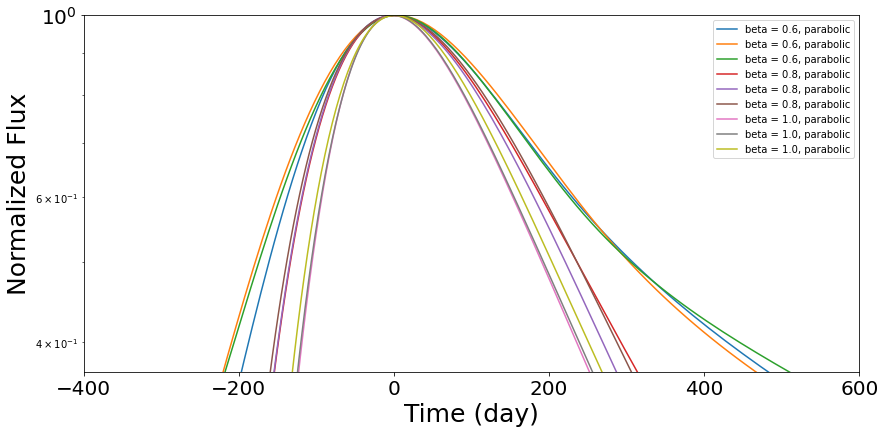

In [11]:
f, ax = plt.subplots(figsize=(12, 6))

P50_b0_6_chk_0100.Mdot_t(ax=ax, Bin=1500, N=8, norm=True)
P110_b0_6_chk_0100.Mdot_t(ax=ax, Bin=1500, N=8, norm=True)
b0_6_chk_0100.Mdot_t(ax=ax, Bin=1500, N=9, norm=True)

P50_b0_8_chk_0080.Mdot_t(ax=ax, Bin=1500, N=5, norm=True)
P110_b0_8_chk_0080.Mdot_t(ax=ax, Bin=1500, N=5, norm=True)
b0_8_chk_0080.Mdot_t(ax=ax, Bin=1500, N=5, norm=True)

P50_b1_chk_0060.Mdot_t(ax=ax, Bin=1500, N=5, norm=True)
P110_b1_chk_0060.Mdot_t(ax=ax, Bin=1500, N=5, norm=True)
b1_chk_0060.Mdot_t(ax=ax, Bin=1500, N=5, norm=True)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1/np.e, 1e0])
ax.set_xlim([-400, 600])
ax.legend()

## Test Higher Resolution

In [19]:
download_npz('m1.0_p10_b0.8_P110_HR')
download_npz('m1.0_p10_b0.6_P110_HR')
download_npz('m1.0_p10_b1.0_P110_HR')

In [20]:
P110_b0_6_chk_0080_114_HR = dmdt(DIR='m1.0_p10_b0.6_P110_HR', chk='0080', Period=114)
P110_b0_8_chk_0080_114_HR = dmdt(DIR='m1.0_p10_b0.8_P110_HR', chk='0080', Period=114)
P110_b0_6_chk_0080_HR = dmdt(DIR='m1.0_p10_b0.6_P110_HR', chk='0080', Period=-1)
P110_b0_8_chk_0080_HR = dmdt(DIR='m1.0_p10_b0.8_P110_HR', chk='0080', Period=-1)
#P110_b1_chk_0060_114_HR = dmdt(DIR='m1.0_p10_b1.0_P110_HR', chk='0080', Period=114)

In [21]:
P110_b0_6_chk_0060_114_HR = dmdt(DIR='m1.0_p10_b0.6_P110_HR', chk='0060', Period=114)
P110_b0_8_chk_0060_114_HR = dmdt(DIR='m1.0_p10_b0.8_P110_HR', chk='0060', Period=114)
P110_b0_6_chk_0060_HR = dmdt(DIR='m1.0_p10_b0.6_P110_HR', chk='0060', Period=-1)
P110_b0_8_chk_0060_HR = dmdt(DIR='m1.0_p10_b0.8_P110_HR', chk='0060', Period=-1)

(-6.0, 6.0)

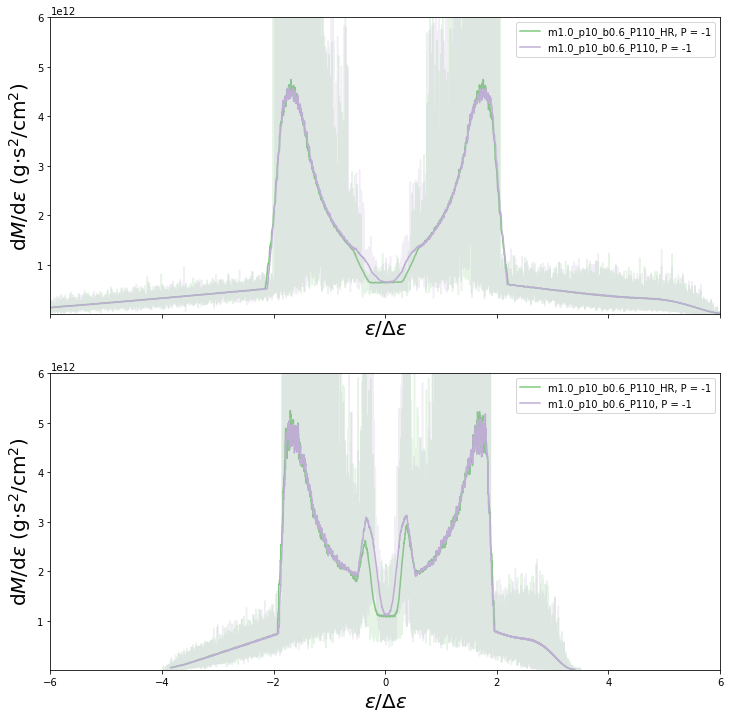

In [24]:
f, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
col = ['#7fc97f', '#beaed4']
P110_b0_6_chk_0060_HR.dm_de_e(ax=ax[0], Bin=200, beta=0.6, color=col[0])
P110_b0_6_chk_0060.dm_de_e(ax=ax[0], Bin=200, beta=0.6, color=col[1])
P110_b0_6_chk_0080_HR.dm_de_e(ax=ax[1], Bin=200, beta=0.6, color=col[0])
P110_b0_6_chk_0080.dm_de_e(ax=ax[1], Bin=200, beta=0.6, color=col[1])
ax[0].legend()
ax[1].legend()
ax[0].set_yscale('linear')
ax[1].set_yscale('linear')
ax[0].set_ylim(1e10, 6e12)
ax[1].set_ylim(1e10, 6e12)
ax[1].set_xlim(-6, 6)

(0.0, 60000000000000.0)

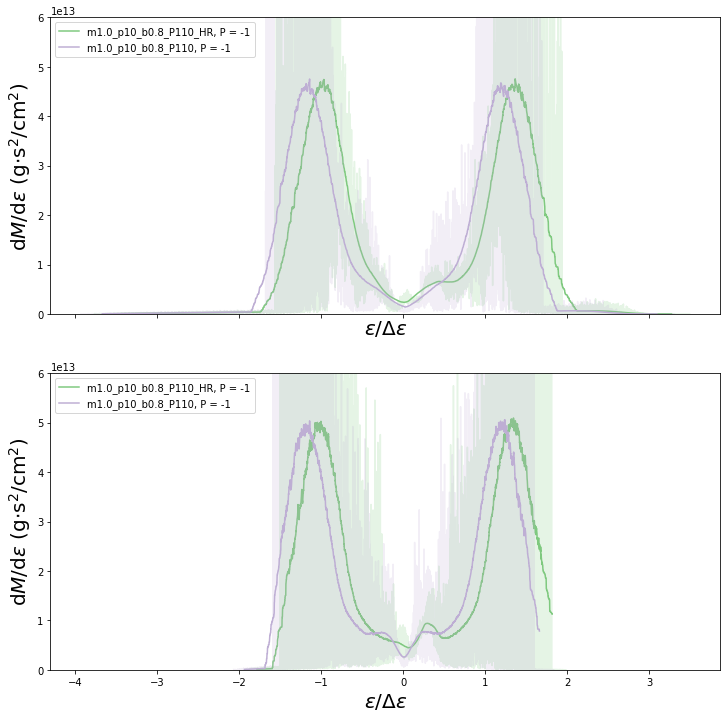

In [23]:
f, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
col = ['#7fc97f', '#beaed4']
P110_b0_8_chk_0060_HR.dm_de_e(ax=ax[0], Bin=500, beta=0.8, color=col[0])
P110_b0_8_chk_0060.dm_de_e(ax=ax[0], Bin=500, beta=0.8, color=col[1])
P110_b0_8_chk_0080_HR.dm_de_e(ax=ax[1], Bin=500, beta=0.8, color=col[0])
P110_b0_8_chk_0080.dm_de_e(ax=ax[1], Bin=500, beta=0.8, color=col[1])
ax[0].legend()
ax[1].legend()
ax[0].set_yscale('linear')
ax[1].set_yscale('linear')
ax[0].set_ylim(0, 6e13)
ax[1].set_ylim(0, 6e13)